# Assignment 1

In [216]:
from sympy import factorial

name = "Mitiusheva Uliana"
if name is None:
    raise ValueError("Put your full name in the `name` variable")

The objective of this assignment is to test a bunch of different topics we've discussed during our introductory classes. Complete the following exercises:

## Instructions

Complete the notebook and create a folder with your name, and put the notebook in that folder. Make a Pull Request with your code.

## Exercise 0

Write your own simple function with simple documentation and all types of arguments (positional, positional with defaults, arbitrary args, keyword args, arbitrary keyword args)

In [217]:
# your code here
def my_function(name, age=18, *profiles, city='Moscow', **marks):
    """
    Parameters:
    - name (str): The name of the person
    - age (int): The age of the person. Default is 18
    - *profiles: Profiles of study
    - city (str): The city where the person lives. Default is "Moscow"
    - **marks: Marks from attsetate
    """
    return name

## Exercise 1


In [218]:
def is_prime(n):
    """
    Check if the number is prime or not.
    """
    for i in range(2, int(n ** 0.5) + 1):
        if n % i == 0:
            return False
    return True

## Exercise 2

[Inspect](https://docs.python.org/3.7/library/inspect.html) will help you. Use `my_function` for tests.



In [219]:
import inspect

def inspect_function(func):
    """
    Takes another function as an argument (but not built-in) 
    and print the following data: 
    the name of the analyzed function, 
    the name of all the arguments it takes 
    and their types (positional, keyword, etc.)
    """
    print(func.__name__, inspect.signature(func),  sep='\n')

    for name, param in  inspect.signature(func).parameters.items():
        if param.kind == inspect.Parameter.POSITIONAL_ONLY:
            arg_type = "Positional Only"
        elif param.kind == inspect.Parameter.POSITIONAL_OR_KEYWORD:
            arg_type = "Positional or Keyword"
        elif param.kind == inspect.Parameter.VAR_POSITIONAL:
            arg_type = "Arbitrary Positional (*args)"
        elif param.kind == inspect.Parameter.KEYWORD_ONLY:
            arg_type = "Keyword Only"
        elif param.kind == inspect.Parameter.VAR_KEYWORD:
            arg_type = "Arbitrary Keyword (**kwargs)"
        else:
            arg_type = "Unknown"

        print(f"  - {name}: {arg_type}")

In [220]:
inspect_function(my_function)

my_function
(name, age=18, *profiles, city='Moscow', **marks)
  - name: Positional or Keyword
  - age: Positional or Keyword
  - profiles: Arbitrary Positional (*args)
  - city: Keyword Only
  - marks: Arbitrary Keyword (**kwargs)


## Exercise 3

The `my_time_now` function is not working correctly. Correct it so that it displays the current time with a message. 

In [221]:
from datetime import datetime
from time import sleep
 
# wrong function
def my_time_now(msg):
    print(msg, datetime.now())


In [222]:
# simple tests :)
my_time_now('The time is now: ')
sleep(1)
my_time_now('The time is now: ')
sleep(1)
my_time_now('The time is now: ')

The time is now:  2024-12-30 12:21:09.351357
The time is now:  2024-12-30 12:21:10.353711
The time is now:  2024-12-30 12:21:11.359117


## Exercise 4

In [223]:
def limit(input_generator, max_count):
    """
    Generator that returns not more than max_count values of the input_generator.
    """
    count = 0
    for value in input_generator:
        if count < max_count:
            yield value
            count += 1
        else:
            break

## Exercise 5

Write a generator for an infinite sequence of numbers from the Pascal's triangle. The sequence look like this:
`1 1 1 1 2 1 1 3 3 1 1 4 6 4 1 1 5 10 10 5 1 1 6 15 20 15 6 1 1 7 21 35 35 21 7 1 1 8 28 56 70 56 28 8 1 1 9 36 84 126 126 84 36 9 1 ... '

Test it with a generator from the previous task)

In [224]:
import math

def pascal_triangle():
    n = 0
    while True:
        for i in range(0, n + 1):
            yield int(math.factorial(n) / (math.factorial(i) * math.factorial(n - i)))
        n += 1


In [225]:
limited_pascal = limit(pascal_triangle(), 20)

for value in limited_pascal:
    print(value)


1
1
1
1
2
1
1
3
3
1
1
4
6
4
1
1
5
10
10
5


## Exercise 6


In [226]:
import pathlib  # can change to os module if you want
import sys

def files_sorted_by_size(path_to_dir):
    """
    Return a list of files in path_to_dir sorted by size.
    The same size files sorted alphabetically
    """
    path_to_dir = pathlib.Path(path_to_dir)
    list_to_sort = []
    for path in path_to_dir.iterdir():
        if path.is_file():
            list_to_sort.append([path, path.name, path.stat().st_size])
    sorted_list = sorted(list_to_sort, key=lambda x: (x[2], x[1]))
    return (item[0] for item in sorted_list)

In [227]:
path = pathlib.Path('../aoc_example')
for file in files_sorted_by_size(path):
    print(file)

../aoc_example/test_day2.py
../aoc_example/aoc1.py
../aoc_example/aoc2.py
../aoc_example/test_day1.py


## Exercise 7

Write a `merge_sorter` generator that merges sorted sequences of integers.

The generator takes an arbitrary number of arguments. The argument can be any iterable, including another generator. It is guaranteed that each argument is a sequence of integers, sorted in non-decreasing order.

In [228]:
import heapq

def merge_sorter(*args):
    heap = []
    iterators = [iter(arg) for arg in args]
    for i, it in enumerate(iterators):
        first_element = next(it, None)
        if first_element is not None:
            heapq.heappush(heap, (first_element, i, it))
    while heap:
        smallest, i, it = heapq.heappop(heap)
        yield smallest
        next_element = next(it, None)
        if next_element is not None:
            heapq.heappush(heap, (next_element, i, it))

In [285]:
seq1 = [0, 9, 10]
seq2 = [1, 3, 6, 8]
seq3 = [2, 4, 5, 7]

for num in merge_sorter(seq1, seq2, seq3):
    print(num)

0
1
2
3
4
5
6
7
8
9
10


## Exercise 8

Write the decorator `proﬁler`, which, when calling a function, will store in its attributes (not to be confused with arguments) the time of its execution (in seconds, it can be fractional) and the number of recursive calls that occurred during execution. Name the attributes `last_time_taken` and `calls`.
It is forbidden to use global variables.
The decorator must behave in a decent manner, that is, it must not overwrite the function's documentation.

For tests write [Ackermann function](https://en.wikipedia.org/wiki/Ackermann_function)

In [244]:
import time
from functools import wraps

def profiler(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        if wrapper.call_depth == 0:
            wrapper.calls = 0
            start_time = time.time()

        wrapper.call_depth += 1
        wrapper.calls += 1

        result = func(*args, **kwargs)

        wrapper.call_depth -= 1
        if wrapper.call_depth == 0:
            wrapper.last_time_taken = time.time() - start_time
        return result

    wrapper.call_depth = 0
    wrapper.calls = 0
    wrapper.last_time_taken = 0.0
    return wrapper

@profiler
def ackermann(n, m):
    if n == 0:
        return m + 1
    elif m == 0:
        return ackermann(n - 1, 1)
    else:
        return ackermann(n - 1, ackermann(n, m - 1))

In [245]:
ackermann(3, 4)

125

## Exercise 9

Write the function `encode` that implements [run-length encoding](https://en.wikipedia.org/wiki/Run-length_encoding) algorithm

In [232]:
def encode(sequence):
    i = 1
    rle = ''
    while i < len(sequence):
        count = 1
        while i < len(sequence) and sequence[i] == sequence[i - 1]:
            count += 1
            i += 1
        rle += sequence[i - 1] + str(count)
        i += 1
    return rle

In [233]:
encode('uuulliiiiiaaaaannaaaa')

'u3l2i5a5n2a4'

## Exercise 10

Write a decorator `visualizer` that takes a recursive function and will visualize the recursive calls that are made during the execution.
Consider using the `networkx` library or some other one in order to draw the recursion tree.
Test it with a recursive function that computes fibonacci.

In [246]:
import networkx as nx
import matplotlib.pyplot as plt

def visualizer(func):
    func.call_id = 0
    func.graph = nx.DiGraph()
    func.call_stack = []

    def wrapper(*args, **kwargs):
        call_label = f"{', '.join(map(str, args))}"
        func.call_id += 1
        current_id = func.call_id
        func.graph.add_node(current_id, label=call_label)
        if func.call_stack:
            parent_id = func.call_stack[-1]
            func.graph.add_edge(parent_id, current_id)
        func.call_stack.append(current_id)
        result = func(*args, **kwargs)
        func.call_stack.pop()
        return result

    def draw_graph():
        labels = nx.get_node_attributes(func.graph, 'label')
        pos = nx.spring_layout(func.graph, seed=47)
        plt.figure(figsize=(8, 6))
        nx.draw(
            func.graph,
            pos,
            with_labels=True,
            labels=labels,
            node_size=1500,
            font_size=8,
            arrows=True,
            node_color='red')
        plt.title("Recursion Tree")
    wrapper.draw_graph = draw_graph
    return wrapper

In [247]:
@visualizer
def fibonacci(n):
    if n == 0 or n == 1:
        return n
    return fibonacci(n-1) + fibonacci(n-2)

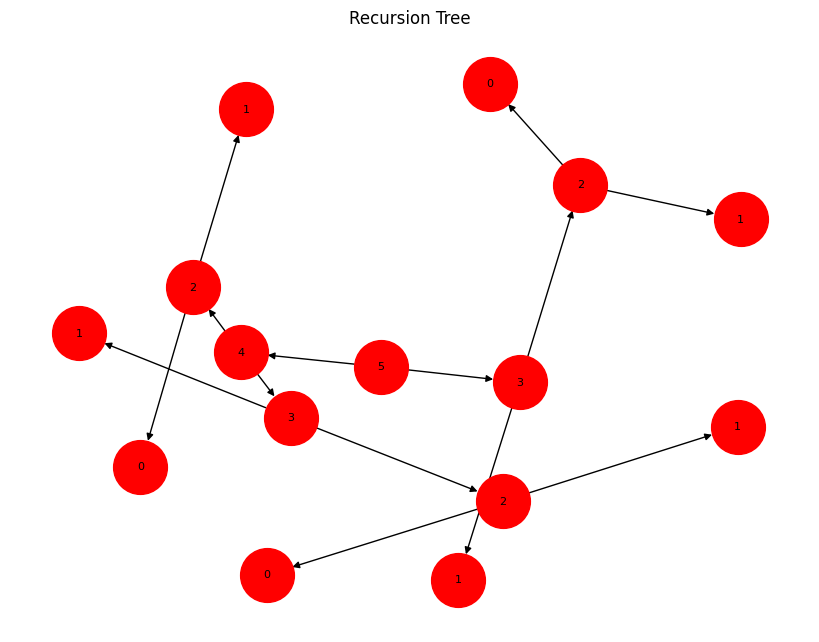

In [248]:
value = fibonacci(5)
fibonacci.draw_graph()

## Exercise 11

Now write a decorator `memoizer` that will do caching on the calls of a function (memoization). 
Decorate fibonacci with the decorators `memoizer`, `profiler` and `visualizer` at the same time (not necessarily in that order). Test that they're working as one would expect.

In [260]:
def memoizer(func):
    cache = {}

    @wraps(func)
    def wrapper(*args, **kwargs):
        key = (args, tuple(sorted(kwargs.items())))
        if key in cache:
            return cache[key]
        result = func(*args, **kwargs)
        cache[key] = result
        return result

    wrapper.cache = cache
    return wrapper

In [261]:
@profiler
@visualizer
@memoizer
def fibonacci(n):
    if n == 0 or n == 1:
        return n
    return fibonacci(n-1) + fibonacci(n-2)

function(5) = 5
Time: 0.000091 seconds
Number of calls: 9


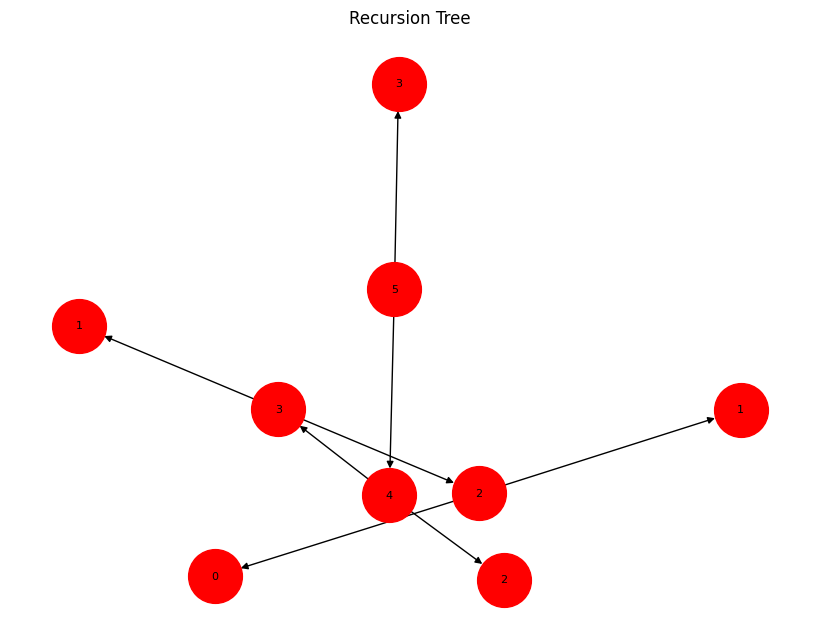

In [262]:
result = fibonacci(5)
print(f"function({5}) = {result}")
print(f"Time: {fibonacci.last_time_taken:.6f} seconds")
print(f"Number of calls: {fibonacci.calls}")

fibonacci.draw_graph()

## Exercise 12

By using the `isinstance` method, check whether the following objects belong to the proposed types (hint: `isinstance`).

Visualize this correspondance matrix (object – type), e.g. using numpy and [pcolormesh](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolormesh.html) for visualization.

In [265]:
list_of_objects = [
    int,
    2,
    2.,
    None,
    object,
    str,
    str(2.),
    float('2.0'),
    'hello',
    dict,
    list,
    [dict],
    {1: []}
]

list_of_types = [
    int,
    float,
    object,
    str,
    dict,
    list
]

In [268]:
import numpy as np

correspondence_matrix = np.zeros((len(list_of_objects), len(list_of_types)), dtype=int)

for i, obj in enumerate(list_of_objects):
    for j, typ in enumerate(list_of_types):
        correspondence_matrix[i, j] = isinstance(obj, typ)

In [270]:
object_labels = [repr(obj) for obj in list_of_objects]
type_labels = [typ.__name__ for typ in list_of_types]

In [283]:
import warnings
warnings.filterwarnings('ignore')

Text(0.5, 1.0, 'Isinstance correspondence matrix')

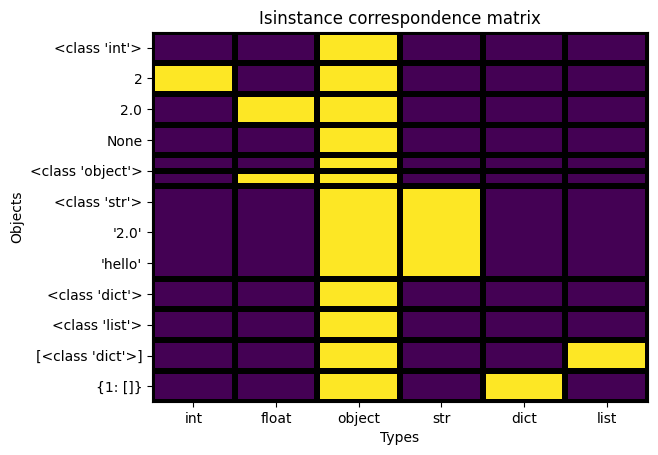

In [284]:
fig, ax = plt.subplots()
ax.pcolormesh(type_labels, object_labels, correspondence_matrix, edgecolors='k', linewidth=4)

ax.invert_yaxis()
ax.set_xlabel('Types')
ax.set_ylabel('Objects')
ax.set_title('Isinstance correspondence matrix')
